In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from datetime import datetime
import matplotlib.pyplot as plt
import sklearn.metrics as metrics

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Dataset_AU.xlsx - Sheet1 (1).csv",index_col='Date')
df

,District,Mandal,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
Date,,,,,,,,,
2019/01/01,Adilabad,Bheempoor,0.0,3.2,27.2,22.3,89.9,0.0,1.3
2019/01/02,Adilabad,Bheempoor,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2019/01/03,Adilabad,Bheempoor,0.0,6.8,31.3,31.8,83.3,0.0,1.3
2019/01/04,Adilabad,Bheempoor,0.0,7.5,30.8,39.9,93.7,0.0,0.8
2019/01/05,Adilabad,Bheempoor,0.0,8.8,31.2,38.4,90.4,0.0,0.7
...,...,...,...,...,...,...,...,...,...
2022/09/26,Adilabad,Bheempoor,0.0,23.6,36.4,65.8,99.9,0.0,3.4
2022/09/27,Adilabad,Bheempoor,2.5,25.0,34.0,77.5,99.9,0.0,5.7
2022/09/28,Adilabad,Bheempoor,10.3,23.9,34.2,73.0,99.9,0.0,2.7


In [ ]:
null_pct=df.apply(pd.isnull).sum()/df.shape[0]
null_pct

District                 0.000000
Mandal                   0.000000
Rainfall (mm)            0.000000
temp_min (⁰C)            0.000000
temp_max (⁰C)            0.000000
humidity_min (%)         0.000000
humidity_max (%)         0.000000
wind_speed_max (Kmph)    0.000000
wind_speed_min (Kmph)    0.000769
dtype: float64

In [ ]:
df.dtypes

District                  object
Mandal                    object
Rainfall (mm)            float64
temp_min (⁰C)            float64
temp_max (⁰C)            float64
humidity_min (%)         float64
humidity_max (%)         float64
wind_speed_max (Kmph)    float64
wind_speed_min (Kmph)    float64
dtype: object

In [ ]:
df.index

Index(['2019/01/01', '2019/01/02', '2019/01/03', '2019/01/04', '2019/01/05',
       '2019/01/06', '2019/01/07', '2019/01/08', '2019/01/09', '2019/01/10',
       ...
       '2022/09/21', '2022/09/22', '2022/09/23', '2022/09/24', '2022/09/25',
       '2022/09/26', '2022/09/27', '2022/09/28', '2022/09/29', '2022/09/30'],
      dtype='object', name='Date', length=1301)

In [ ]:
df.index=pd.to_datetime(df.index)

In [ ]:

df=df.ffill()
df

,District,Mandal,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
Date,,,,,,,,,
2019-01-01,Adilabad,Bheempoor,0.0,3.2,27.2,22.3,89.9,0.0,1.3
2019-01-02,Adilabad,Bheempoor,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2019-01-03,Adilabad,Bheempoor,0.0,6.8,31.3,31.8,83.3,0.0,1.3
2019-01-04,Adilabad,Bheempoor,0.0,7.5,30.8,39.9,93.7,0.0,0.8
2019-01-05,Adilabad,Bheempoor,0.0,8.8,31.2,38.4,90.4,0.0,0.7
...,...,...,...,...,...,...,...,...,...
2022-09-26,Adilabad,Bheempoor,0.0,23.6,36.4,65.8,99.9,0.0,3.4
2022-09-27,Adilabad,Bheempoor,2.5,25.0,34.0,77.5,99.9,0.0,5.7
2022-09-28,Adilabad,Bheempoor,10.3,23.9,34.2,73.0,99.9,0.0,2.7


<Axes: xlabel='Date'>

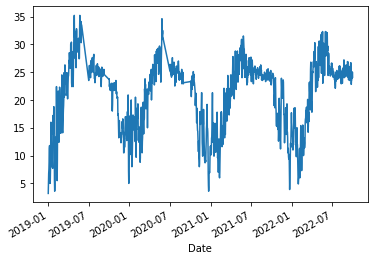

In [ ]:
df["temp_min (⁰C)"].plot()

<Axes: xlabel='Date'>

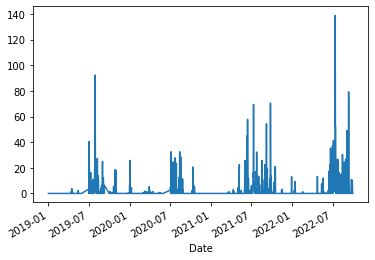

In [ ]:
df["Rainfall (mm)"].plot()

<Axes: xlabel='Date'>

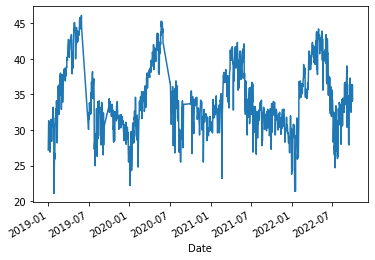

In [ ]:
df["temp_max (⁰C)"].plot()

<Axes: xlabel='Date'>

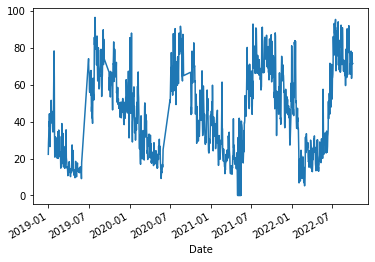

In [ ]:
df["humidity_min (%)"].plot()

<Axes: xlabel='Date'>

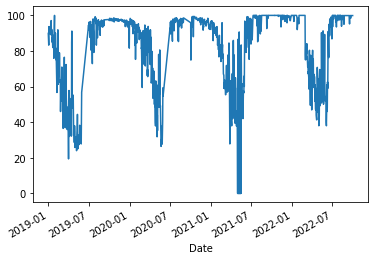

In [ ]:
df["humidity_max (%)"].plot()

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Dataset_AU.xlsx - Sheet1 (1).csv', parse_dates=['Date'])
data.head()

,District,Mandal,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,Adilabad,Bheempoor,2019-01-01,0.0,3.2,27.2,22.3,89.9,0.0,1.3
1,Adilabad,Bheempoor,2019-01-02,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2,Adilabad,Bheempoor,2019-01-03,0.0,6.8,31.3,31.8,83.3,0.0,1.3
3,Adilabad,Bheempoor,2019-01-04,0.0,7.5,30.8,39.9,93.7,0.0,0.8
4,Adilabad,Bheempoor,2019-01-05,0.0,8.8,31.2,38.4,90.4,0.0,0.7


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1301 entries, 0 to 1300
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   District               1301 non-null   object        
 1   Mandal                 1301 non-null   object        
 2   Date                   1301 non-null   datetime64[ns]
 3   Rainfall (mm)          1301 non-null   float64       
 4   temp_min (⁰C)          1301 non-null   float64       
 5   temp_max (⁰C)          1301 non-null   float64       
 6   humidity_min (%)       1301 non-null   float64       
 7   humidity_max (%)       1301 non-null   float64       
 8   wind_speed_max (Kmph)  1301 non-null   float64       
 9   wind_speed_min (Kmph)  1300 non-null   float64       
dtypes: datetime64[ns](1), float64(7), object(2)
memory usage: 101.8+ KB


In [ ]:
data.drop(['District','Mandal'],axis=1,inplace=True)
data

,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,2019-01-01,0.0,3.2,27.2,22.3,89.9,0.0,1.3
1,2019-01-02,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2,2019-01-03,0.0,6.8,31.3,31.8,83.3,0.0,1.3
3,2019-01-04,0.0,7.5,30.8,39.9,93.7,0.0,0.8
4,2019-01-05,0.0,8.8,31.2,38.4,90.4,0.0,0.7
...,...,...,...,...,...,...,...,...
1296,2022-09-26,0.0,23.6,36.4,65.8,99.9,0.0,3.4
1297,2022-09-27,2.5,25.0,34.0,77.5,99.9,0.0,5.7
1298,2022-09-28,10.3,23.9,34.2,73.0,99.9,0.0,2.7
1299,2022-09-29,0.8,25.0,36.3,71.4,99.9,0.0,23.0


In [ ]:
data['Date'] = data['Date'].apply(lambda x: datetime.timestamp(x))


In [ ]:
data

,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,1.546301e+09,0.0,3.2,27.2,22.3,89.9,0.0,1.3
1,1.546387e+09,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2,1.546474e+09,0.0,6.8,31.3,31.8,83.3,0.0,1.3
3,1.546560e+09,0.0,7.5,30.8,39.9,93.7,0.0,0.8
4,1.546646e+09,0.0,8.8,31.2,38.4,90.4,0.0,0.7
...,...,...,...,...,...,...,...,...
1296,1.664150e+09,0.0,23.6,36.4,65.8,99.9,0.0,3.4
1297,1.664237e+09,2.5,25.0,34.0,77.5,99.9,0.0,5.7
1298,1.664323e+09,10.3,23.9,34.2,73.0,99.9,0.0,2.7
1299,1.664410e+09,0.8,25.0,36.3,71.4,99.9,0.0,23.0


In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
null_pct

Date                     0.000000
Rainfall (mm)            0.000000
temp_min (⁰C)            0.000000
temp_max (⁰C)            0.000000
humidity_min (%)         0.000000
humidity_max (%)         0.000000
wind_speed_max (Kmph)    0.000000
wind_speed_min (Kmph)    0.000769
dtype: float64

In [ ]:
data=data.ffill()

In [ ]:
null_pct=data.apply(pd.isnull).sum()/data.shape[0]
null_pct

Date                     0.0
Rainfall (mm)            0.0
temp_min (⁰C)            0.0
temp_max (⁰C)            0.0
humidity_min (%)         0.0
humidity_max (%)         0.0
wind_speed_max (Kmph)    0.0
wind_speed_min (Kmph)    0.0
dtype: float64

In [ ]:
features = ['Date', 'Rainfall (mm)','temp_min (⁰C)', 'temp_max (⁰C)', 'humidity_min (%)', 'humidity_max (%)', 'wind_speed_max (Kmph)', 'wind_speed_min (Kmph)']

In [ ]:
data['target']=data.shift(-1)['temp_max (⁰C)']

In [ ]:
data=data.ffill()
data

,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph),target
0,1.546301e+09,0.0,3.2,27.2,22.3,89.9,0.0,1.3,29.4
1,1.546387e+09,0.0,5.0,29.4,28.7,86.8,0.0,1.0,31.3
2,1.546474e+09,0.0,6.8,31.3,31.8,83.3,0.0,1.3,30.8
3,1.546560e+09,0.0,7.5,30.8,39.9,93.7,0.0,0.8,31.2
4,1.546646e+09,0.0,8.8,31.2,38.4,90.4,0.0,0.7,30.8
...,...,...,...,...,...,...,...,...,...
1296,1.664150e+09,0.0,23.6,36.4,65.8,99.9,0.0,3.4,34.0
1297,1.664237e+09,2.5,25.0,34.0,77.5,99.9,0.0,5.7,34.2
1298,1.664323e+09,10.3,23.9,34.2,73.0,99.9,0.0,2.7,36.3
1299,1.664410e+09,0.8,25.0,36.3,71.4,99.9,0.0,23.0,34.2


In [ ]:
X = data[features]
y = data['target']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=False)

In [ ]:
X_train

,Date,Rainfall (mm),temp_min (⁰C),temp_max (⁰C),humidity_min (%),humidity_max (%),wind_speed_max (Kmph),wind_speed_min (Kmph)
0,1.546301e+09,0.0,3.2,27.2,22.3,89.9,0.0,1.3
1,1.546387e+09,0.0,5.0,29.4,28.7,86.8,0.0,1.0
2,1.546474e+09,0.0,6.8,31.3,31.8,83.3,0.0,1.3
3,1.546560e+09,0.0,7.5,30.8,39.9,93.7,0.0,0.8
4,1.546646e+09,0.0,8.8,31.2,38.4,90.4,0.0,0.7
...,...,...,...,...,...,...,...,...
1035,1.641600e+09,0.0,14.3,29.9,43.3,97.7,0.0,3.8
1036,1.641686e+09,0.0,18.5,29.0,60.9,96.6,0.0,1.6
1037,1.641773e+09,2.0,17.6,30.7,53.1,100.0,0.0,3.1
1038,1.641859e+09,1.3,18.4,24.4,83.2,100.0,0.0,0.6


In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train_scaled.shape

(1040, 8)

The default initializer in Keras is the "glorot_uniform" initializer, also known as the Xavier uniform initializer.

ensures that the variance of the activations is approximately equal across the layers, which can help to improve the stability and speed of training.

In [ ]:
model = Sequential()
model.add(Dense(64, input_dim=8, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

In [ ]:
model.compile(loss='mse', optimizer='adam')

 The name "Adam" stands for Adaptive Moment Estimation, which reflects its adaptive learning rate strategy.

 

In [ ]:
history=model.fit(X_train_scaled, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
104/104 - 1s - loss: 957.8403 - 767ms/epoch - 7ms/step
Epoch 2/100
104/104 - 0s - loss: 205.0092 - 138ms/epoch - 1ms/step
Epoch 3/100
104/104 - 0s - loss: 44.7572 - 131ms/epoch - 1ms/step
Epoch 4/100
104/104 - 0s - loss: 28.5823 - 137ms/epoch - 1ms/step
Epoch 5/100
104/104 - 0s - loss: 20.0694 - 128ms/epoch - 1ms/step
Epoch 6/100
104/104 - 0s - loss: 15.6302 - 138ms/epoch - 1ms/step
Epoch 7/100
104/104 - 0s - loss: 13.0076 - 128ms/epoch - 1ms/step
Epoch 8/100
104/104 - 0s - loss: 11.4690 - 145ms/epoch - 1ms/step
Epoch 9/100
104/104 - 0s - loss: 10.2391 - 142ms/epoch - 1ms/step
Epoch 10/100
104/104 - 0s - loss: 9.2619 - 142ms/epoch - 1ms/step
Epoch 11/100
104/104 - 0s - loss: 8.4316 - 128ms/epoch - 1ms/step
Epoch 12/100
104/104 - 0s - loss: 7.7897 - 132ms/epoch - 1ms/step
Epoch 13/100
104/104 - 0s - loss: 7.2889 - 135ms/epoch - 1ms/step
Epoch 14/100
104/104 - 0s - loss: 6.7678 - 126ms/epoch - 1ms/step
Epoch 15/100
104/104 - 0s - loss: 6.3755 - 133ms/epoch - 1ms/step
Epoch 16

In [ ]:
loss= model.evaluate(X_test_scaled, y_test)
print('Test loss:', loss)


9/9 [==============================] - 0s 2ms/step - loss: 242.5940
Test loss: 242.593994140625


In [ ]:
predictions = model.predict(X_test_scaled).flatten()

9/9 [==============================] - 0s 1ms/step


In [ ]:
predictions

array([26.581186, 25.416803, 28.690346, 26.637756, 27.38218 , 28.601381,
       29.181774, 29.064615, 30.046139, 30.02364 , 30.86546 , 28.32119 ,
       27.62394 , 27.92113 , 27.842924, 28.407455, 28.141207, 29.717762,
       32.211266, 83.81321 , 83.7205  , 83.623245, 83.21717 , 83.42923 ,
       83.51839 , 83.82515 , 83.344696, 85.86082 , 82.96438 , 83.01326 ,
       83.07105 , 75.118034, 83.695076, 83.631615, 83.34072 , 82.785545,
       83.64799 , 83.28287 , 82.32108 , 83.52729 , 84.13032 , 84.14573 ,
       83.77932 , 84.12295 , 84.19367 , 84.08846 , 84.01746 , 36.10347 ,
       35.087433, 35.880882, 35.6404  , 35.25882 , 35.116238, 35.310677,
       34.71302 , 36.410793, 36.002083, 36.030106, 37.73603 , 36.27221 ,
       38.071945, 38.761013, 40.581535, 42.26626 , 43.113228, 40.14757 ,
       38.985   , 40.986465, 41.447147, 41.958176, 42.8556  , 39.57064 ,
       40.9991  , 40.549286, 42.65299 , 43.001423, 44.000977, 43.850235,
       44.50415 , 42.46551 , 42.32705 , 41.131836, 

In [ ]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': predictions})

In [ ]:
results

,Actual,Predicted
1040,26.3,26.581186
1041,27.1,25.416803
1042,21.4,28.690346
1043,26.9,26.637756
1044,29.0,27.382179
...,...,...
1296,34.0,35.681240
1297,34.2,35.125572
1298,36.3,32.056957
1299,34.2,47.978554


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae_nn=mean_absolute_error(results["Actual"], results["Predicted"])
mae_nn

7.001390933625086

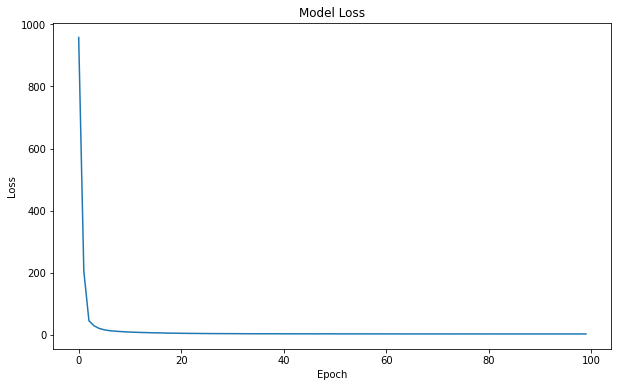

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

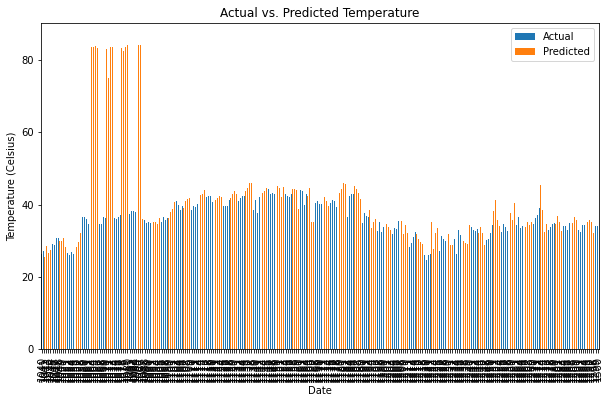

In [ ]:
import matplotlib.pyplot as plt

ax = results[['Actual', 'Predicted']].plot(kind='bar', figsize=(10,6))

ax.set_xlabel('Date')
ax.set_ylabel('Temperature (Celsius)')
ax.set_title('Actual vs. Predicted Temperature')
plt.show()

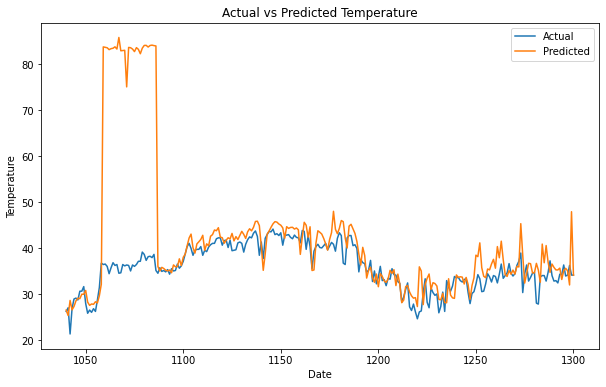

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Actual'], label='Actual')
plt.plot(results.index, results['Predicted'], label='Predicted')
plt.title('Actual vs Predicted Temperature')
plt.xlabel('Date')
plt.ylabel('Temperature')
plt.legend()
plt.show()

In [ ]:
from datetime import datetime

date_str = '2019-01-01'

date_object = datetime.strptime(date_str, '%Y-%m-%d').date()
print(type(date_object))
print(date_object)  # printed in default format

<class 'datetime.date'>
2019-01-01


In [ ]:
#New Case:
from datetime import date, datetime
#d=[2019,1,1]
d = date(2019,1,1)
date1 = datetime.combine(d, datetime.min.time()).timestamp()
date1

1546300800.0

In [ ]:
features=[date1,0.0,3.2,	27.2,	22.3,	89.9,	0.0	,1.3]
X_test_scaled_new = scaler.transform([features])

/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
X_test_scaled_new

array([[-1.7767716 , -0.2664598 , -2.73909809, -1.46015503, -1.01632028,
         0.32344406, -0.47898517, -0.33884844]])

In [ ]:
prediction = model.predict(X_test_scaled_new).flatten()
prediction

1/1 [==============================] - 0s 18ms/step


array([29.76685], dtype=float32)